# COMP30850 Assignment -1
### <font color = dark red>SURABHI AGARWAL - 17203535</font>

> - The objective of this assignment is to construct and characterise network representations of two movie-related datasets. 
>- The networks model the co- starring relations between actors - i.e. the collaboration network of actors who appear together in the same movies.


# Table of Contents:

> - [Task 1: Network Construction](#task-1)
    - a) Parsing the JSON data (both dataset 1 and 2) and creating an appropriate co-starring network using     NetworkX, where nodes represent individual actors.
        - [Task 1.1 : Parsing data for Dataset 1](#Dataset-1)
        - [Task 1.1 : Parsing data for Dataset 2](#Dataset-2)
    - b) Identifying and removing any isolated nodes from the network
        - [Task 1.2 : Creating network for Dataset 1](#Network-1)
        - [Task 1.2 : Creating network for Dataset 2](#Network-2)
> - [Task 2 : Network Characterisation](#task-2)
    - a) Applying a range of different methods to characterise the structure and connectivity of the network.
        - [Task 2.1 : Characteristics for Network 1](#Char-1)
        - [Task 2.1 : Characteristics for Network 2](#Char-2)
    - b) Applying different centrality measures to identify important nodes in the network.
        - [Task 2.2 : Measuring centrality for Network 1](#Cent-1)
        - [Task 2.2 : Measuring centrality for Network 2](#Cent-2)
    - [Summary of Characteristics & Centrality Measures for both Networks](#Sum)
> - [Task 3 : Ego Centric Analysis](#task-3)
    - Selecting one of the important nodes in the network as identified in Task 2b. Generating an ego network for this node and characterising the structure of that new smaller network.
        - [Task 3 : Ego node & Characteristics for Network 1](#Ego-1)
        - [Task 3 : Ego node & Characteristics for Network 2](#Ego-2)
> - [Task 4 : Network Visualization](#task-4)
     - a) Exporting both the network as GEXF files
     - b) Loading the GEXF file in Gephi. Using the layout functionality to produce a useful visualisation of the network. Saving a final image of your network visualisation as a PNG file.
     - Note: Networks are saved as Network1.png & Network2.png respectively

In [423]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.precision", 3)

 <a class="anchor" id="task-1"></a>
 
# Task 1: Network Construction

**_<font color= blue>Parsing JSON datasets: </font>_**
> - a) Parsing the JSON data (both dataset 1 and 2) and creating an appropriate co-starring network using NetworkX, where nodes represent individual actors.
> - b) Identifying and removing any isolated nodes from the network

 <a class="anchor" id="Dataset-1"></a>
**_<font color= blue>Parsing JSON for Dataset 1 </font>_**


In [424]:
#Using pandas dataframe to parse the json dataset 1
data1 = pd.read_json("17203535-dataset1.json")
data1

,id,name,born,movies
0,731772,Cliff Robertson,1923-09-09,"[{'id': '0413300', 'title': 'Spider-Man 3', 'r..."
1,98,Jennifer Aniston,1969-02-11,"[{'id': '1618434', 'title': 'Murder Mystery', ..."
2,4695,Jessica Alba,1981-04-28,"[{'id': '8400758', 'title': 'Killers Anonymous..."
3,1671512,Anamaria Marinca,1978-04-01,"[{'id': '7556122', 'title': 'The Old Guard', '..."
4,148,Harrison Ford,1942-07-13,"[{'id': '1462764', 'title': 'Untitled Indiana ..."
...,...,...,...,...
138,2071,Will Ferrell,1967-07-16,"[{'id': '8580274', 'title': 'Eurovision', 'rol..."
139,10736,Amy Adams,1974-08-20,"[{'id': '6772802', 'title': 'Hillbilly Elegy',..."
140,1584,Miranda Otto,1967-12-16,"[{'id': '4558376', 'title': 'Downhill', 'role'..."
141,206257,Rosario Dawson,1979-05-09,"[{'id': '11268970', 'title': 'Glimmer', 'role'..."


In [425]:
#For dataset 1
#extracting the movie ID for each of the actors from the movie list
def get_movies_data1(actor_id):
    list = []
    for i in range(len(data1['movies'][actor_id])):
        list.append(data1['movies'][actor_id][i]['id'])
    return list

#creating a name map and a movie map to map the names of the actors and get the names of actors for each movie they did
name_map={}
movie_map={}
for j in range(len(data1.index)):
    name_map[data1.index[j]] = [data1["name"][j]]
    movie_map[data1["name"][j]] = get_movies_data1(j)


**_<font color= blue>Parsing JSON for Dataset 2: </font>_**
 <a class="anchor" id="Dataset-2"></a>

In [426]:
#Using pandas dataframe to parse the json dataset 2
data2 = pd.read_json("17203535-dataset2.json")
data2

,id,name,born,movies
0,115,Nicolas Cage,1964-01-07,"[{'id': '5843576', 'title': '10 Double Zero', ..."
1,112,Pierce Brosnan,1953-05-16,"[{'id': '10155932', 'title': 'Cinderella', 'ro..."
2,1321,Richard Harris,1930-10-01,"[{'id': '0284741', 'title': 'Caesar', 'role': ..."
3,531,Frances McDormand,1957-06-23,"[{'id': '8847712', 'title': 'The French Dispat..."
4,1502541,Tom Yi,NaN,"[{'id': '6385768', 'title': '3 Days with Dad',..."
...,...,...,...,...
149,1411676,Mindy Kaling,1979-06-24,"[{'id': '6107548', 'title': 'Late Night', 'rol..."
150,781981,Jason Segel,1980-01-18,"[{'id': '9608818', 'title': 'The Friend', 'rol..."
151,493,Jack Lemmon,1925-02-08,"[{'id': '0146984', 'title': 'The Legend of Bag..."
152,473,Diane Keaton,1946-01-05,"[{'id': '5125894', 'title': 'Poms', 'role': 'a..."


In [427]:
#Similarly, we have for dataset 2
#extracting the movie ID for each of the actors from the movie list
def get_movies_data2(actor_id):
    list = []
    for i in range(len(data2['movies'][actor_id])):
        list.append(data2['movies'][actor_id][i]['id'])
    return list

#creating a name map and a movie map to map the names of the actors and get the names of actors for each movie they did
name_map_2={}
movie_map_2={}
for j in range(len(data2.index)):
    name_map_2[data2.index[j]] = [data2["name"][j]]
    movie_map_2[data2["name"][j]] = get_movies_data2(j)

In [428]:
#Now we need to compare the elements in the movie list so that the actors who did the same movie can create an edge
def get_weight(map1, map2): 
    weight = 0
    for x in map1: 
        for y in map2: 
            if x == y: 
                weight+=1
    return weight

**_<font color= blue>Creating a weighted undirected network for both the datasets: </font>_**
> - Creating the graphs and adding actors as nodes. Since movies are done by all actors present in it, I use 2 ***undirected networks*** to represent the datasets. Also, since many actors could have common movies, it makes sense for us to have ***weighted undirected networks***.
> - Plotting the resuting the networks, using matplotlib, I visualized the resulting networks.

**_<font color= blue>Network for Dataset 1: </font>_**
 <a class="anchor" id="Network-1"></a>

In [429]:
#Creating a weighted undirected network
graph_1 = nx.Graph()
#Adding names of actors as nodes
for i in range (len(data1.index)):
    graph_1.add_node(data1['name'][i])


In [430]:
#Calculating the number of nodes in graph 1
graph_1.number_of_nodes()

143

In [431]:
def display_graph(g, network, color):
    # create the figure
    plt.figure(figsize=(10,10))
    title = "Undirected network for Graph %d" %(network)
    plt.title(title, fontsize=14)
    # lay out all nodes
    pos = nx.spring_layout(g)
    # draw the full network
    nx.draw_networkx(g, pos, with_labels=False, font_size=13, node_size=80, node_color=color)
    plt.axis("off")
    plt.show() 

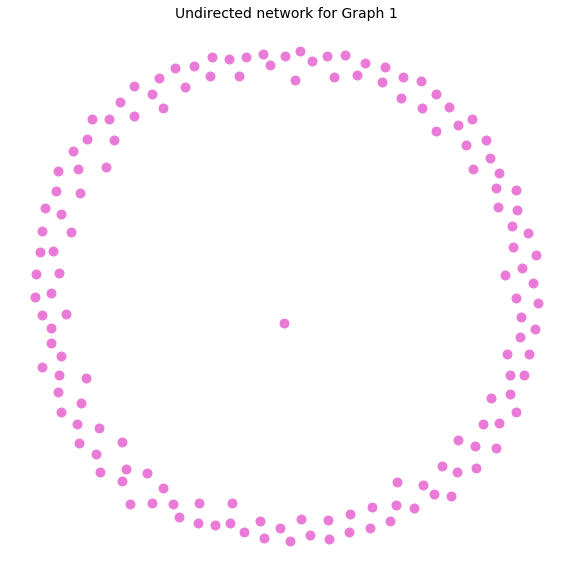

In [289]:
display_graph(graph_1, 1, "#ea7ad7")

In [432]:
#Calculating weight for each of the nodes and adding the edges to the graph by calling weight function

for i in range(len(name_map)):
    for x in range((i+1), len(name_map)):
        w = get_weight(movie_map[name_map[i][0]], movie_map[name_map[x][0]])
        if(w > 0):
            graph_1.add_edge(name_map[i][0], name_map[x][0], weight = w)

In [433]:
#calculating the number of edges
graph_1.number_of_edges()

1267

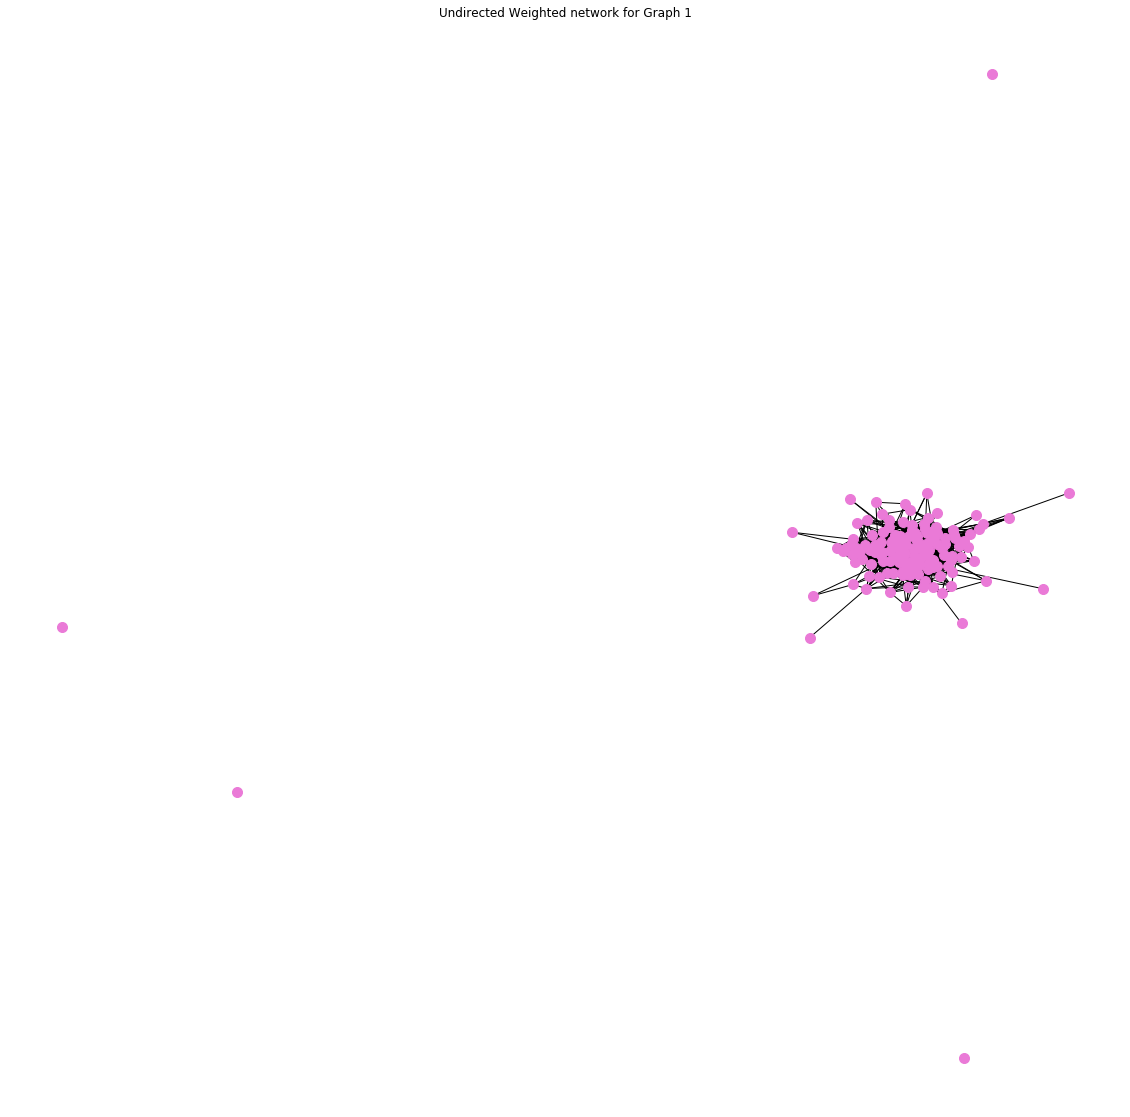

In [292]:
#Plotting the resulting network with edges
plt.figure(figsize=(20,20))
plt.title("Undirected Weighted network for Graph 1")
nx.draw_networkx( graph_1, with_labels=False, node_size=100, node_color="#ea7ad7" )
plt.axis("off")
plt.show()

>- Idnetifying the isolated nodes in the network and removing them, plotting the resulting graph

In [293]:
#Removing isolated nodes from the graph
graph_1.remove_nodes_from(list(nx.isolates(graph_1)))

In [294]:
#calculating the number of edges
graph_1.number_of_edges()

1267

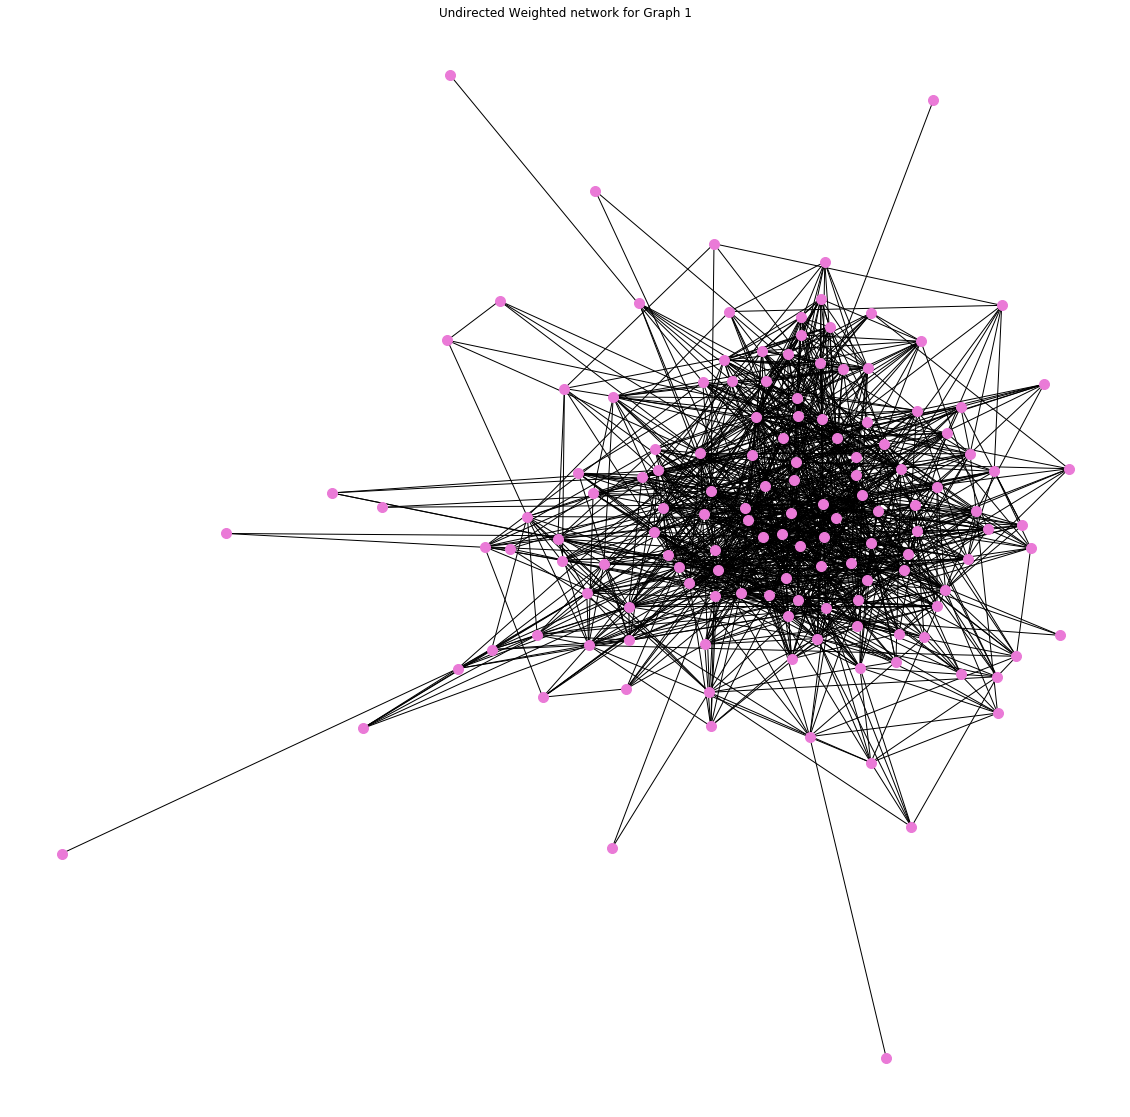

In [295]:
#Plotting the resulting network with all the edges and  nodes
plt.figure(figsize=(20,20))
plt.title("Undirected Weighted network for Graph 1")
nx.draw_networkx( graph_1, with_labels=False, node_size=100, node_color="#ea7ad7", font_size = 8 )
plt.axis("off")
plt.show()

In [296]:
# convert the edges in the network to a Pandas DataFrame
data1 = nx.to_pandas_edgelist(graph_1)
#sorting the rows by weight
data1.sort_values(by="weight", ascending=False)

,source,target,weight
254,Julie Walters,Robbie Coltrane,10
200,Emma Watson,Robbie Coltrane,10
552,Rupert Grint,Robbie Coltrane,10
405,Bonnie Wright,Rupert Grint,9
871,Peter Mayhew,Anthony Daniels,9
...,...,...,...
640,Meryl Streep,Catherine Keener,1
641,Meryl Streep,Chris Rock,1
642,Meryl Streep,Anne Hathaway,1
205,Emma Watson,Pam Ferris,1


 <a class="anchor" id="Network-2"></a>
**_<font color= blue>Network for Dataset 2: </font>_**
> - Similarly, for dataset 2, we also construct a ***weighted undirected network***.

In [297]:
#Creating a weighted undirected network
graph_2 = nx.Graph()
#Adding names of actors as nodes
for i in range (len(data2.index)):
    graph_2.add_node(data2['name'][i])

In [298]:
#Calculating the number of nodes in graph 2
graph_2.number_of_nodes()

154

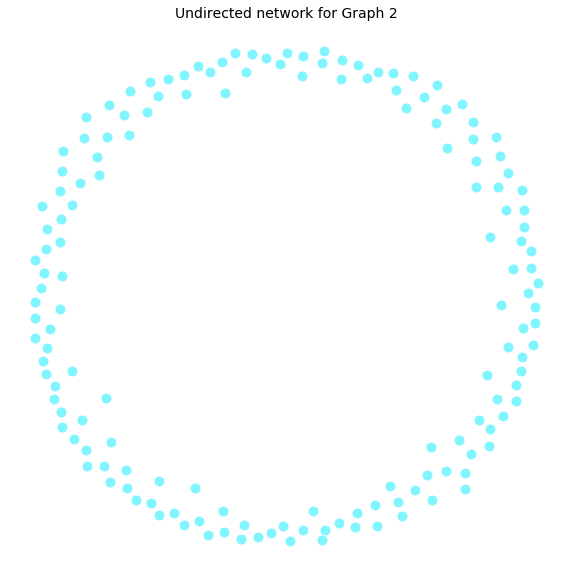

In [299]:
#Plotting the resulting network using matplotlib
display_graph(graph_2, 2, "#81f5ff")

In [300]:
#Calculating weight for each of the nodes and adding the edges to the graph by calling weight function
for i in range(len(name_map_2)):
    for x in range((i+1), len(name_map_2)):
        w = get_weight(movie_map_2[name_map_2[i][0]], movie_map_2[name_map_2[x][0]])
        if(w > 0):
            graph_2.add_edge(name_map_2[i][0], name_map_2[x][0], weight = w)

In [301]:
#calculating the number of edges
graph_2.number_of_edges()

1506

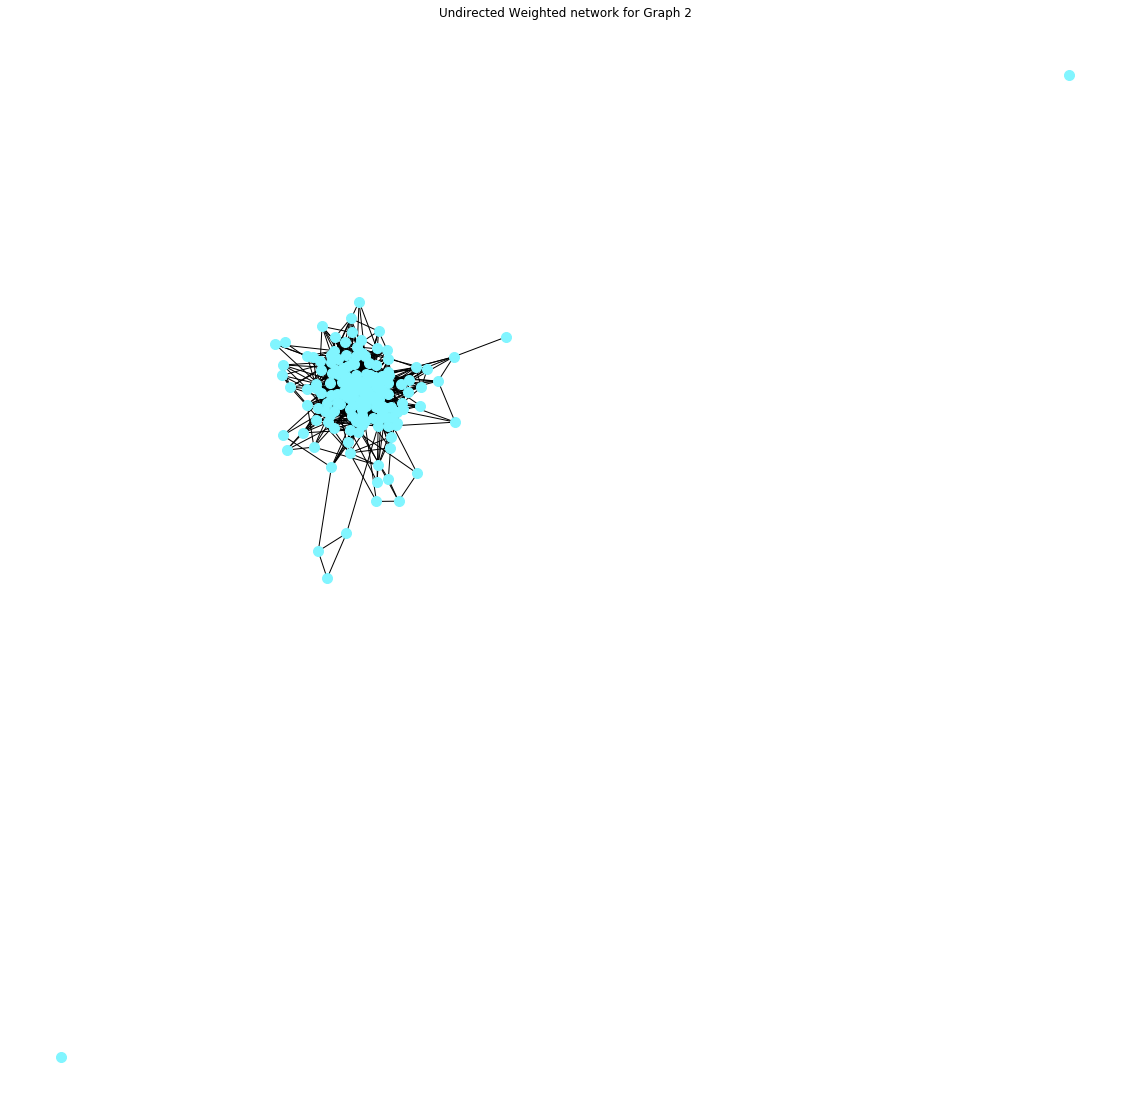

In [302]:
#Plotting the resulting network with edges
plt.figure(figsize=(20,20))
plt.title("Undirected Weighted network for Graph 2")
nx.draw_networkx( graph_2, with_labels=False, node_size=100, node_color="#81f5ff" )
plt.axis("off")
plt.show()

>- Idnetifying the isolated nodes in the network and removing them, plotting the resulting graph

In [303]:
#Removing isolated nodes from the graph
graph_2.remove_nodes_from(list(nx.isolates(graph_2)))

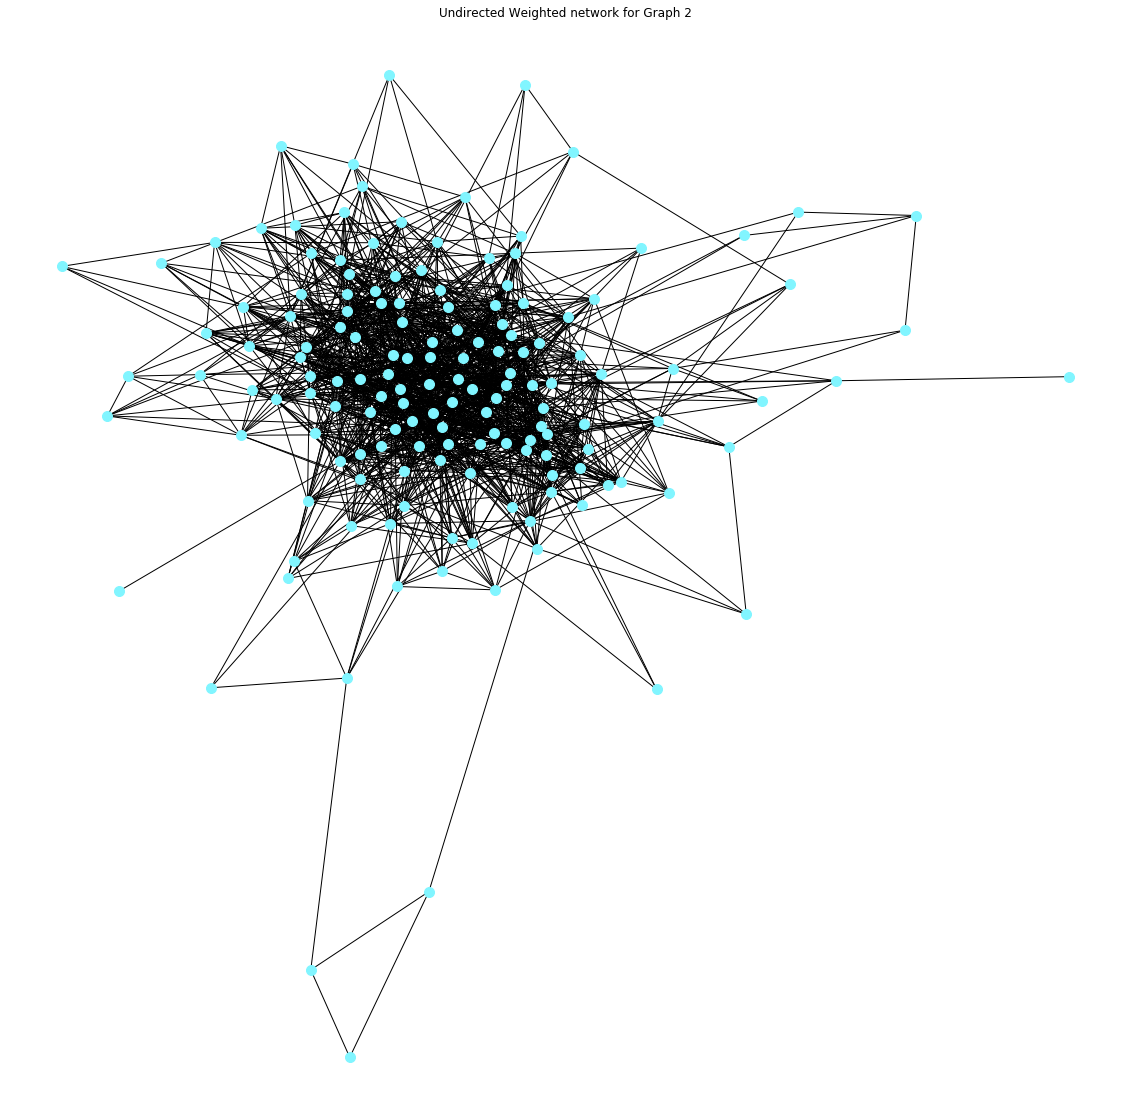

In [304]:
#Plotting the resulting network with all the edges and  nodes
plt.figure(figsize=(20,20))
plt.title("Undirected Weighted network for Graph 2")
nx.draw_networkx( graph_2, with_labels=False, node_size=100, node_color="#81f5ff", font_size = 8 )
plt.axis("off")
plt.show()

In [305]:
# convert the edges in the network to a Pandas DataFrame
data2 = nx.to_pandas_edgelist(graph_2)
#sorting the rows by weight
data2.sort_values(by="weight", ascending=False)

,source,target,weight
1082,Joe Pesci,Robert De Niro,9
1024,Daniel Radcliffe,James Phelps,9
852,Alan Rickman,Daniel Radcliffe,8
1200,Paul Rudd,Seth Rogen,8
1018,Daniel Radcliffe,Maggie Smith,8
...,...,...,...
548,Zach Galifianakis,Tina Fey,1
547,Zach Galifianakis,Sigourney Weaver,1
546,Zach Galifianakis,Viola Davis,1
545,Zach Galifianakis,Whoopi Goldberg,1


 <a class="anchor" id="task-2"></a>
 
# Task 2: Network Characterisation

**_<font color= blue>Identifying structures and characters of the network: </font>_**
> - a) Applying a range of different methods to characterise the structure and connectivity of the network.
> - b) Applying different centrality measures to identify important nodes in the network. 

**_<font color= blue>Characterising Network 1: </font>_**
> - Finding how connected and dense the network is, is it directed, how many nodes and edges are there in the network
> - Finding paths between nodes, shortest paths and lengths of these paths
<a class="anchor" id="Char-1"></a>

In [306]:
#as seen previously, we identify the nodes and the edges again
#Node that now that we gotten rid of isolated nodes, the number 
#of nodes are less than before
(graph_1.number_of_nodes(), graph_1.number_of_edges())

(139, 1267)

In [307]:
#Density and paths : identifying how dense the network is and the level of connectiving of the network
#A dense network is one where the number of edges is close to the maximum possible number of edges.
density_1=nx.density(graph_1)
print("Density of Network 1: ", density_1)

Density of Network 1:  0.13210301324158064


In [308]:
#checking if the network is connected
is_connected_1 = nx.is_connected(graph_1)
print("Is Network 1 connected?: ", is_connected_1)

Is Network 1 connected?:  True


In [309]:
#Making sure that the network is undirected
is_directed_1 = nx.is_directed(graph_1)
print("Is Network 1 directed?: ", is_directed_1)

Is Network 1 directed?:  False


In [310]:
#Recall that graph 1 had the following edge network:
# convert the edges in the network to a Pandas DataFrame
data1 = nx.to_pandas_edgelist(graph_1)
#sorting the rows by weight
data1.sort_values(by="weight", ascending=False)

,source,target,weight
254,Julie Walters,Robbie Coltrane,10
200,Emma Watson,Robbie Coltrane,10
552,Rupert Grint,Robbie Coltrane,10
405,Bonnie Wright,Rupert Grint,9
871,Peter Mayhew,Anthony Daniels,9
...,...,...,...
640,Meryl Streep,Catherine Keener,1
641,Meryl Streep,Chris Rock,1
642,Meryl Streep,Anne Hathaway,1
205,Emma Watson,Pam Ferris,1


In [365]:
#Finding paths between nodes
#A path is a sequence of nodes and edges which connect one node to another.  A graph is connected if every pair of nodes is joined at least by one path.
nx.has_path(graph_1, 'Meryl Streep', 'Catherine Keener')

True

In [367]:
#We can find the shortest path now
#The length of a path is the number of edges it crosses. The shortest path between two nodes in a network is the path with the minimum number of edges.
nx.shortest_path(graph_1, 'Meryl Streep', 'Catherine Keener')


['Meryl Streep', 'Catherine Keener']

In [368]:
#Length of the shortest path is the distance betwee two noes in a network i.e number of edges crossed
nx.shortest_path_length(graph_1, 'Meryl Streep', 'Catherine Keener')

1

In [376]:
#The diameter of a network is the length of the longest shortest path between any pair of nodes in the network.
d1 = nx.diameter(graph_1)
d1

5

In [377]:
print("Number of nodes for Network 1: ", graph_1.number_of_nodes())
print("Number of edges for Network 1: ", graph_1.number_of_edges())
print("Density of Network 1: ", density_1)
print("Is Network 1 connected?: ", is_connected_1)
print("Is Network 1 directed?: ", is_directed_1)
print("Diameter of Network 1: ", d1)

Number of nodes for Network 1:  139
Number of edges for Network 1:  1267
Density of Network 1:  0.13210301324158064
Is Network 1 connected?:  True
Is Network 1 directed?:  False
Diameter of Network 1:  5


<a class="anchor" id="Char-2"></a>
**_<font color= blue>Characteristics for Network 2: </font>_**
> - Similarly we perform analysis for network 2 i.e finding how connected and dense the network is, is it directed, how many nodes and edges are there in the network
> - Finding paths between nodes, shortest paths and lengths of these paths

In [315]:
#as seen previously, we identify the nodes and the edges again
#Node that now that we gotten rid of isolated nodes, the number 
#of nodes are less than before
(graph_2.number_of_nodes(), graph_2.number_of_edges())

(152, 1506)

In [379]:
#Density of network 2
density_2 = nx.density(graph_2)
print("Density of Network 2: ", density_2)

Density of Network 2:  0.13123039386545834


In [317]:
#checking if the network is connected
is_connected_2 = nx.is_connected(graph_2)
print("Is Network 2 connected: ", is_connected_2)

Is Network 2 connected:  True


In [318]:
#Making sure that the network is undirected
is_directed_2 = nx.is_directed(graph_2)
print("Is Network 2 directed?: ", is_directed_2)

Is Network 2 directed?:  False


In [319]:
#Recall that graph 2 had the following edge network:
# convert the edges in the network to a Pandas DataFrame
data2 = nx.to_pandas_edgelist(graph_2)
#sorting the rows by weight
data2.sort_values(by="weight", ascending=False)

,source,target,weight
1082,Joe Pesci,Robert De Niro,9
1024,Daniel Radcliffe,James Phelps,9
852,Alan Rickman,Daniel Radcliffe,8
1200,Paul Rudd,Seth Rogen,8
1018,Daniel Radcliffe,Maggie Smith,8
...,...,...,...
548,Zach Galifianakis,Tina Fey,1
547,Zach Galifianakis,Sigourney Weaver,1
546,Zach Galifianakis,Viola Davis,1
545,Zach Galifianakis,Whoopi Goldberg,1


In [320]:
#Finding paths between nodes
#A path is a sequence of nodes and edges which connect one node to another.  A graph is connected if every pair of nodes is joined at least by one path.
nx.has_path(graph_2, 'Mindy Kaling', 'Jason Segel')

True

In [321]:
#We can find the shortest path now
#The length of a path is the number of edges it crosses. The shortest path between two nodes in a network is the path with the minimum number of edges.
nx.shortest_path(graph_2, 'Jesse Eisenberg', 'Tina Fey')

['Jesse Eisenberg', 'Steve Carell', 'Tina Fey']

In [322]:
#Length of the shortest path is the distance betwee two noes in a network i.e number of edges crossed
nx.shortest_path_length(graph_2, 'Jesse Eisenberg', 'Tina Fey')

2

In [374]:
#The diameter of a network is the length of the longest shortest path between any pair of nodes in the network.
d2 = nx.diameter(graph_2)
d2

5

In [378]:
print("Number of nodes for Network 2: ", graph_2.number_of_nodes())
print("Number of edges for Network 2: ", graph_2.number_of_edges())
print("Density of Network 2: ", density_2)
print("Is Network 2 connected?: ", is_connected_2)
print("Is Network 2 directed?: ", is_directed_2)
print("Diameter of Network 2: ", d2)

Number of nodes for Network 2:  152
Number of edges for Network 2:  1506
Density of Network 2:  0.13123039386545834
Is Network 2 connected?:  True
Is Network 2 directed?:  False
Diameter of Network 2:  5


**_<font color= blue>Measuring Centrality: </font>_**

> - Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.
> - Firstly, we find the node degree for each of the nodes in the graph and look at various statistics for the degree sequence in this network.
> - We thn measure centrality to identify the most important nodes in the network.
> - The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.
> - **betweenness centrality** can be used to find "brokers" or "bridging" nodes in a network.
Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score.
> - **Closeness centrality** measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.
> - The **eigenvector centrality** of a node proportional to the sum of the centrality scores of its neighbours. This means that a node is important if it connected to other important nodes.
> - We will be calculating all of these centrality measures for both our networks

**_<font color= blue>Measuring Centrality for Network 1: </font>_**
<a class="anchor" id="Cent-1"></a>

In [324]:
#Getting a dictionary of degree scores for all the nodes in network 1:
degrees_1 = dict(graph_1.degree())
degrees_1

{'Cliff Robertson': 5,
 'Jennifer Aniston': 20,
 'Jessica Alba': 24,
 'Anamaria Marinca': 4,
 'Harrison Ford': 29,
 'Debra Messing': 11,
 'Russell Crowe': 19,
 'Charlize Theron': 21,
 'Shirley MacLaine': 15,
 'Ansel Elgort': 8,
 'Jack Nicholson': 27,
 'Clint Eastwood': 13,
 'Emma Watson': 22,
 'Emma Thompson': 36,
 'Julie Walters': 23,
 'Imelda Staunton': 22,
 'Zooey Deschanel': 12,
 'Vera Farmiga': 11,
 'Alec Guinness': 9,
 'Kali Hawk': 11,
 'Kim Basinger': 11,
 'David Niven': 1,
 'Dev Patel': 4,
 'Alexandra Maria Lara': 8,
 'Will Smith': 22,
 'Arnold Schwarzenegger': 20,
 'Julia Stiles': 17,
 'Liv Tyler': 16,
 'Bonnie Wright': 15,
 'Emma Stone': 17,
 'Halle Berry': 16,
 'Sidney Poitier': 2,
 'Taron Egerton': 8,
 'Sissy Spacek': 8,
 'Roberto Benigni': 2,
 'Joan Allen': 13,
 'Jonathan Pryce': 16,
 'Glenn Close': 37,
 'Colm Meaney': 21,
 'Jack Black': 27,
 'Rupert Grint': 16,
 'Dolph Lundgren': 12,
 'Adam Driver': 16,
 'Jennifer Connelly': 24,
 'Peter Cushing': 6,
 "Brían F. O'Byrne": 1

In [325]:
#Looking at various statistics for the degree sequence in the network
degree_seq_1 = pd.Series(degrees_1)
degree_seq_1

Cliff Robertson      5
Jennifer Aniston    20
Jessica Alba        24
Anamaria Marinca     4
Harrison Ford       29
                    ..
Will Ferrell        32
Amy Adams           26
Miranda Otto        11
Rosario Dawson      23
Rachel McAdams      15
Length: 139, dtype: int64

In [326]:
print('Degree range for Network 1: [%d, %d]' % (degree_seq_1.min(), degree_seq_1.max() ) )
print('Mean degree for Network 1: %.2f' % degree_seq_1.mean() )
print('Median degree for Network 1: %d' % degree_seq_1.median() )

Degree range for Network 1: [1, 53]
Mean degree for Network 1: 18.23
Median degree for Network 1: 17


In [327]:
#Displaying ranking of the nodes by their degree centrality
deg_1 = nx.degree_centrality(graph_1)
s_1 = pd.Series(deg_1)
dataset_1 = pd.DataFrame(s_1,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_1 = nx.betweenness_centrality(graph_1)
dataset_1["betweenness"] = pd.Series(bet_1)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_1 = nx.closeness_centrality(graph_1)
dataset_1["closeness"] = pd.Series(close_1)

eig_1 = nx.eigenvector_centrality(graph_1)
dataset_1["eigenvector"] = pd.Series(eig)

dataset_1["norm_eigenvector"] = dataset_1["eigenvector"]/max(dataset_1["eigenvector"])

# display the DataFrame sorted by degree centrality
dataset_1.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Bruce Willis,0.384,0.065,0.611,0.202,1.000
Jim Broadbent,0.341,0.038,0.585,0.188,0.932
Willem Dafoe,0.304,0.052,0.580,0.166,0.824
Kate Winslet,0.283,0.023,0.570,0.172,0.853
Meryl Streep,0.283,0.022,0.561,0.166,0.825
Susan Sarandon,0.275,0.031,0.561,0.162,0.804
Kathy Bates,0.275,0.030,0.550,0.151,0.748
Edward Norton,0.275,0.017,0.566,0.165,0.818
Judi Dench,0.268,0.038,0.566,0.153,0.760
Glenn Close,0.268,0.037,0.561,0.138,0.686


In [328]:
dataset_1.corr()

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
degree_centrality,1.000,0.833,0.927,0.979,0.979
betweenness,0.833,1.000,0.701,0.767,0.767
closeness,0.927,0.701,1.000,0.918,0.918
eigenvector,0.979,0.767,0.918,1.000,1.000
norm_eigenvector,0.979,0.767,0.918,1.000,1.000


In [329]:
# Get ranking of the nodes, where 1 indicates the highest rank
ds1=dataset_1["betweenness"].rank(ascending = False)
# dataset_1["betweenness"].rank()
ds1.sort_values()

Bruce Willis         1.0
Willem Dafoe         2.0
Judi Dench           3.0
Jim Broadbent        4.0
Glenn Close          5.0
                   ...  
Sidney Poitier     135.5
Peter Cushing      135.5
Rex Harrison       135.5
Seána Kerslake     135.5
Roberto Benigni    135.5
Name: betweenness, Length: 139, dtype: float64

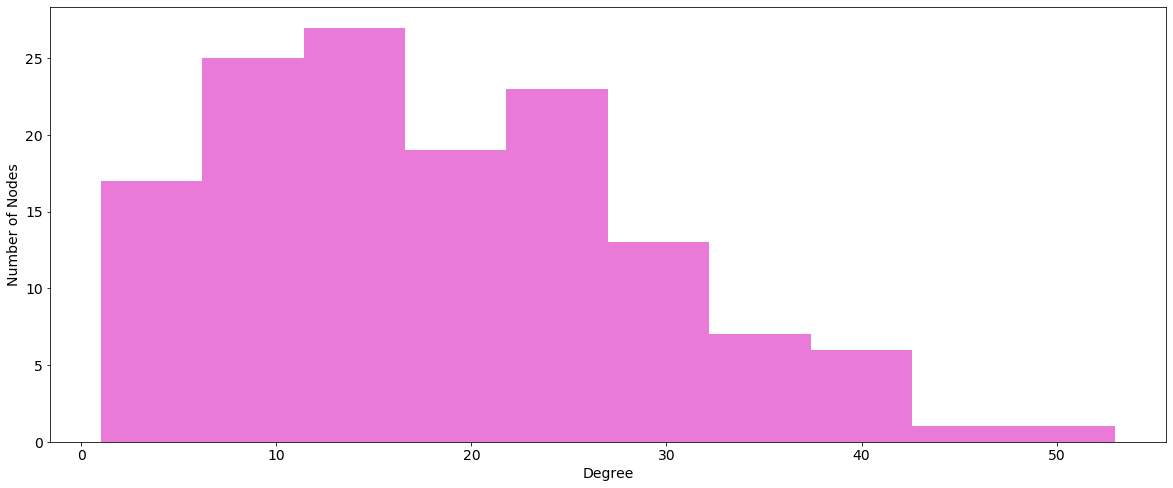

In [330]:
ax_1 = degree_seq_1.plot.hist(figsize=(20,8), fontsize=14, legend=None, color="#ea7ad7")
ax_1.set_ylabel("Number of Nodes", fontsize=14)
ax_1.set_xlabel("Degree", fontsize=14);

**_<font color= blue>Measuring Centrality for Network 2: </font>_**
<a class="anchor" id="Cent-2"></a>

In [331]:
#Getting a dictionary of degree scores for all the nodes in network 2:
degrees_2 = dict(graph_2.degree())
degrees_2

{'Nicolas Cage': 25,
 'Pierce Brosnan': 17,
 'Richard Harris': 18,
 'Frances McDormand': 29,
 'Tom Yi': 8,
 'Matthew Perry': 4,
 'Julie Christie': 22,
 'Seann William Scott': 7,
 'Terry Crews': 26,
 'Ashton Kutcher': 18,
 'Timothée Chalamet': 14,
 'William Hurt': 39,
 'Richard Dreyfuss': 21,
 'Marcia Gay Harden': 25,
 'Robert Duvall': 30,
 'Steve Carell': 27,
 'Fiona Shaw': 28,
 'Adrien Brody': 22,
 'Gabriel Byrne': 29,
 'George C. Scott': 5,
 'August Diehl': 7,
 'Winona Ryder': 20,
 'Gene Hackman': 24,
 'Jessica Lange': 20,
 'Gwyneth Paltrow': 28,
 'Rod Steiger': 14,
 'Hiam Abbass': 7,
 'Helen Hunt': 16,
 'Paul Newman': 14,
 'Helena Bonham Carter': 30,
 'Zach Galifianakis': 26,
 'Betty White': 12,
 'Julianne Moore': 44,
 'Tom Hanks': 24,
 'Anna Kendrick': 10,
 'Naomi Watts': 24,
 'Ben Stiller': 35,
 'Kenneth Branagh': 28,
 'Brendan Gleeson': 39,
 'Jane Fonda': 14,
 'Mila Kunis': 16,
 'Ewan McGregor': 39,
 'Vinnie Jones': 12,
 'Abigail Breslin': 23,
 'Jean-Claude Van Damme': 8,
 'Eddie

In [332]:
#Looking at various statistics for the degree sequence in the network
degree_seq_2 = pd.Series(degrees_2)
degree_seq_2

Nicolas Cage         25
Pierce Brosnan       17
Richard Harris       18
Frances McDormand    29
Tom Yi                8
                     ..
Mindy Kaling         14
Jason Segel          14
Jack Lemmon          20
Diane Keaton         18
Jet Li                6
Length: 152, dtype: int64

In [333]:
print('Degree range of Network 2: [%d, %d]' % (degree_seq_2.min(), degree_seq_2.max() ) )
print('Mean degree of Network 2: %.2f' % degree_seq_2.mean() )
print('Median degree of Network 2: %d' % degree_seq_2.median() )

Degree range of Network 2: [1, 51]
Mean degree of Network 2: 19.82
Median degree of Network 2: 19


In [334]:
#Displaying ranking of the nodes by their degree centrality
deg_2 = nx.degree_centrality(graph_2)
s_2 = pd.Series(deg_2)
dataset_2 = pd.DataFrame(s_2,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_2 = nx.betweenness_centrality(graph_2)
dataset_2["betweenness"] = pd.Series(bet_2)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_2 = nx.closeness_centrality(graph_2)
dataset_2["closeness"] = pd.Series(close_2)

eig_2 = nx.eigenvector_centrality(graph_2)
dataset_2["eigenvector"] = pd.Series(eig_2)

dataset_2["norm_eigenvector"] = dataset_2["eigenvector"]/max(dataset_2["eigenvector"])
#dataset_1.sort_values(['eigenvector', 'norm_eigenvector'],ascending=False).head(10)

# display the DataFrame sorted by degree centrality
dataset_2.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)


,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Liam Neeson,0.338,0.039,0.583,0.185,1.000
John Lithgow,0.298,0.032,0.563,0.145,0.784
Robert De Niro,0.291,0.037,0.566,0.150,0.811
Julia Roberts,0.291,0.026,0.561,0.150,0.812
Julianne Moore,0.291,0.023,0.563,0.156,0.845
Ralph Fiennes,0.291,0.015,0.566,0.178,0.964
Brendan Gleeson,0.258,0.022,0.543,0.135,0.728
Ewan McGregor,0.258,0.019,0.543,0.137,0.739
William Hurt,0.258,0.015,0.543,0.148,0.799
Natalie Portman,0.252,0.016,0.543,0.138,0.746


In [335]:
dataset_2.corr()

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
degree_centrality,1.000,0.792,0.916,0.984,0.984
betweenness,0.792,1.000,0.642,0.735,0.735
closeness,0.916,0.642,1.000,0.914,0.914
eigenvector,0.984,0.735,0.914,1.000,1.000
norm_eigenvector,0.984,0.735,0.914,1.000,1.000


In [336]:
# Get ranking of the nodes, where 1 indicates the highest rank
ds2=dataset_2["betweenness"].rank( ascending=False )
ds2.sort_values()

Liam Neeson            1.0
Alan Rickman           2.0
Robert De Niro         3.0
John Lithgow           4.0
Penélope Cruz          5.0
                     ...  
Martin Lawrence      148.0
Paprika Steen        149.0
Julia Jentsch        151.0
Taraneh Alidoosti    151.0
Lola Dueñas          151.0
Name: betweenness, Length: 152, dtype: float64

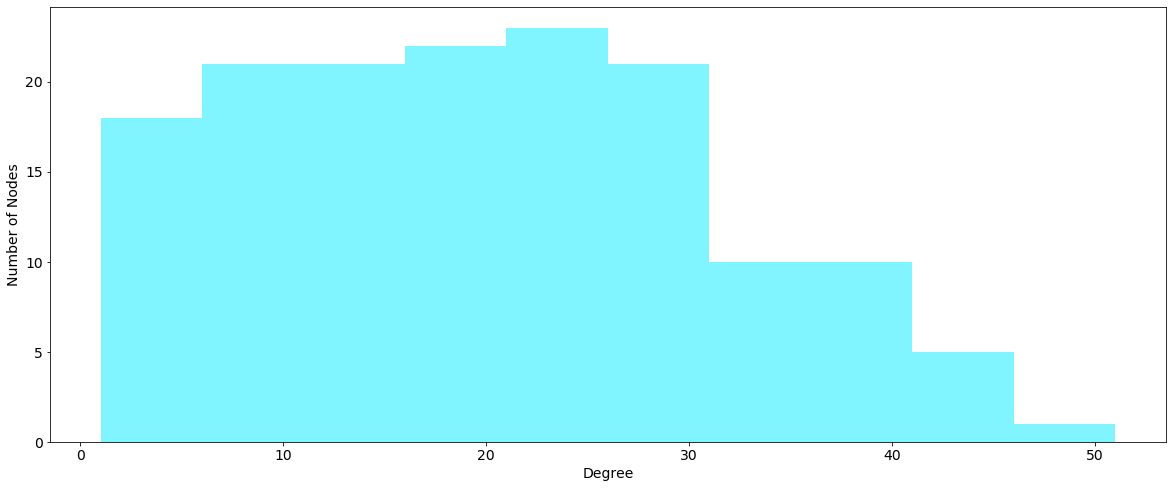

In [337]:
ax_2 = degree_seq_2.plot.hist(figsize=(20,8), fontsize=14, legend=None, color="#81f5ff")
ax_2.set_ylabel("Number of Nodes", fontsize=14)
ax_2.set_xlabel("Degree", fontsize=14);

## Summary of Characteristics & Centrality Analysis for the networks
 <a class="anchor" id="Sum"></a>
**_<font color= blue>Analysing Characteristics: </font>_**
> - Recall that for Network 1, we had the following characteristics:
    - Number of nodes for Network 1:  139
    - Number of edges for Network 1:  1267
    - Density of Network 1:  0.13210301324158064
    - Is Network 1 connected?:  True
    - Is Network 1 directed?:  False
    - Diameter of Network 1:  5
> - Also, for Network 2, we had the following characteristics:
    - Number of nodes for Network 2:  152
    - Number of edges for Network 2:  1506
    - Density of Network 2:  0.13123039386545834
    - Is Network 2 connected?:  True
    - Is Network 2 directed?:  False
    - Diameter of Network 2:  5
> - ***Difference***: From the above information, we can summarise the two networks are different because Network 2 has more number number of nodes and edges in it's network, while Network 1 is a little bit more dense since it has a greater density than network 1.
> - ***Similarity***: We can also see that both the networks are similar in a way that they both are connected and they both are undirected graphs and a diameter of 5.

**_<font color= blue>Analysing Centrality measures: </font>_**
> - Centrality measures throw light upon the most important nodes in the network
> - In Network 1, we found Bruce Willis as one of the most important nodes with the following statistics:
    - Degree Centrality 0.384
    - Betweeness 0.065
    - Closeness 0.611
    - Eigenvector 0.202
    - Norm Eigenvector 1.000
> - In Network 2, we found Liam Neeson as one of the most important nodes with the following statistics:
    - Degree Centrality 0.338
    - Betweeness 0.039
    - Closeness 0.583
    - Eigenvector 0.185
    - Norm Eigenvector 1.000
> - One interesting observation to note is that since the betweeness and closeness of the most important node for Network 2 is lesser than Network 1, we can see why the density of Network 2 is less than Network 1.


 <a class="anchor" id="task-3"></a>
 
# Task 3: Ego Centric Analysis

**_<font color= blue>Identifying an Ego node and analysing it: </font>_**
> -  Generating an ego network for an node and characterising the structure of the new smaller network.


**_<font color= blue>Ego node for Network 1: </font>_**
<a class="anchor" id="Ego-1"></a>
> - We have seen previously that Bruce Willis was the more important node according to his ranking.
> - We categorize this as our ego node for this network.

In [338]:
ego_node_1 = "Bruce Willis"
alters = graph_1.neighbors(ego_node_1)
for node in alters:
    print(node)

Jessica Alba
Jack Nicholson
Zooey Deschanel
Kim Basinger
Arnold Schwarzenegger
Liv Tyler
Halle Berry
Sidney Poitier
Joan Allen
Jonathan Pryce
Colm Meaney
Jack Black
Dolph Lundgren
Jennifer Connelly
Brían F. O'Byrne
Meryl Streep
Dustin Hoffman
Uma Thurman
Jonah Hill
Willem Dafoe
Jessica Tandy
Antonio Banderas
Faye Dunaway
Colin Farrell
Philip Seymour Hoffman
Mark Hamill
Robbie Coltrane
Sharon Stone
Edward Norton
Susan Sarandon
Patrick Wilson
Kathy Bates
Goldie Hawn
Sean Penn
Owen Wilson
Luke Wilson
Louise Fletcher
Cate Blanchett
Catherine Keener
Cameron Diaz
Chris Tucker
Kate Hudson
Demi Moore
Kate Winslet
Ernest Borgnine
Melissa McCarthy
Judi Dench
Forest Whitaker
Carrie Fisher
Mickey Rourke
Will Ferrell
Amy Adams
Rosario Dawson


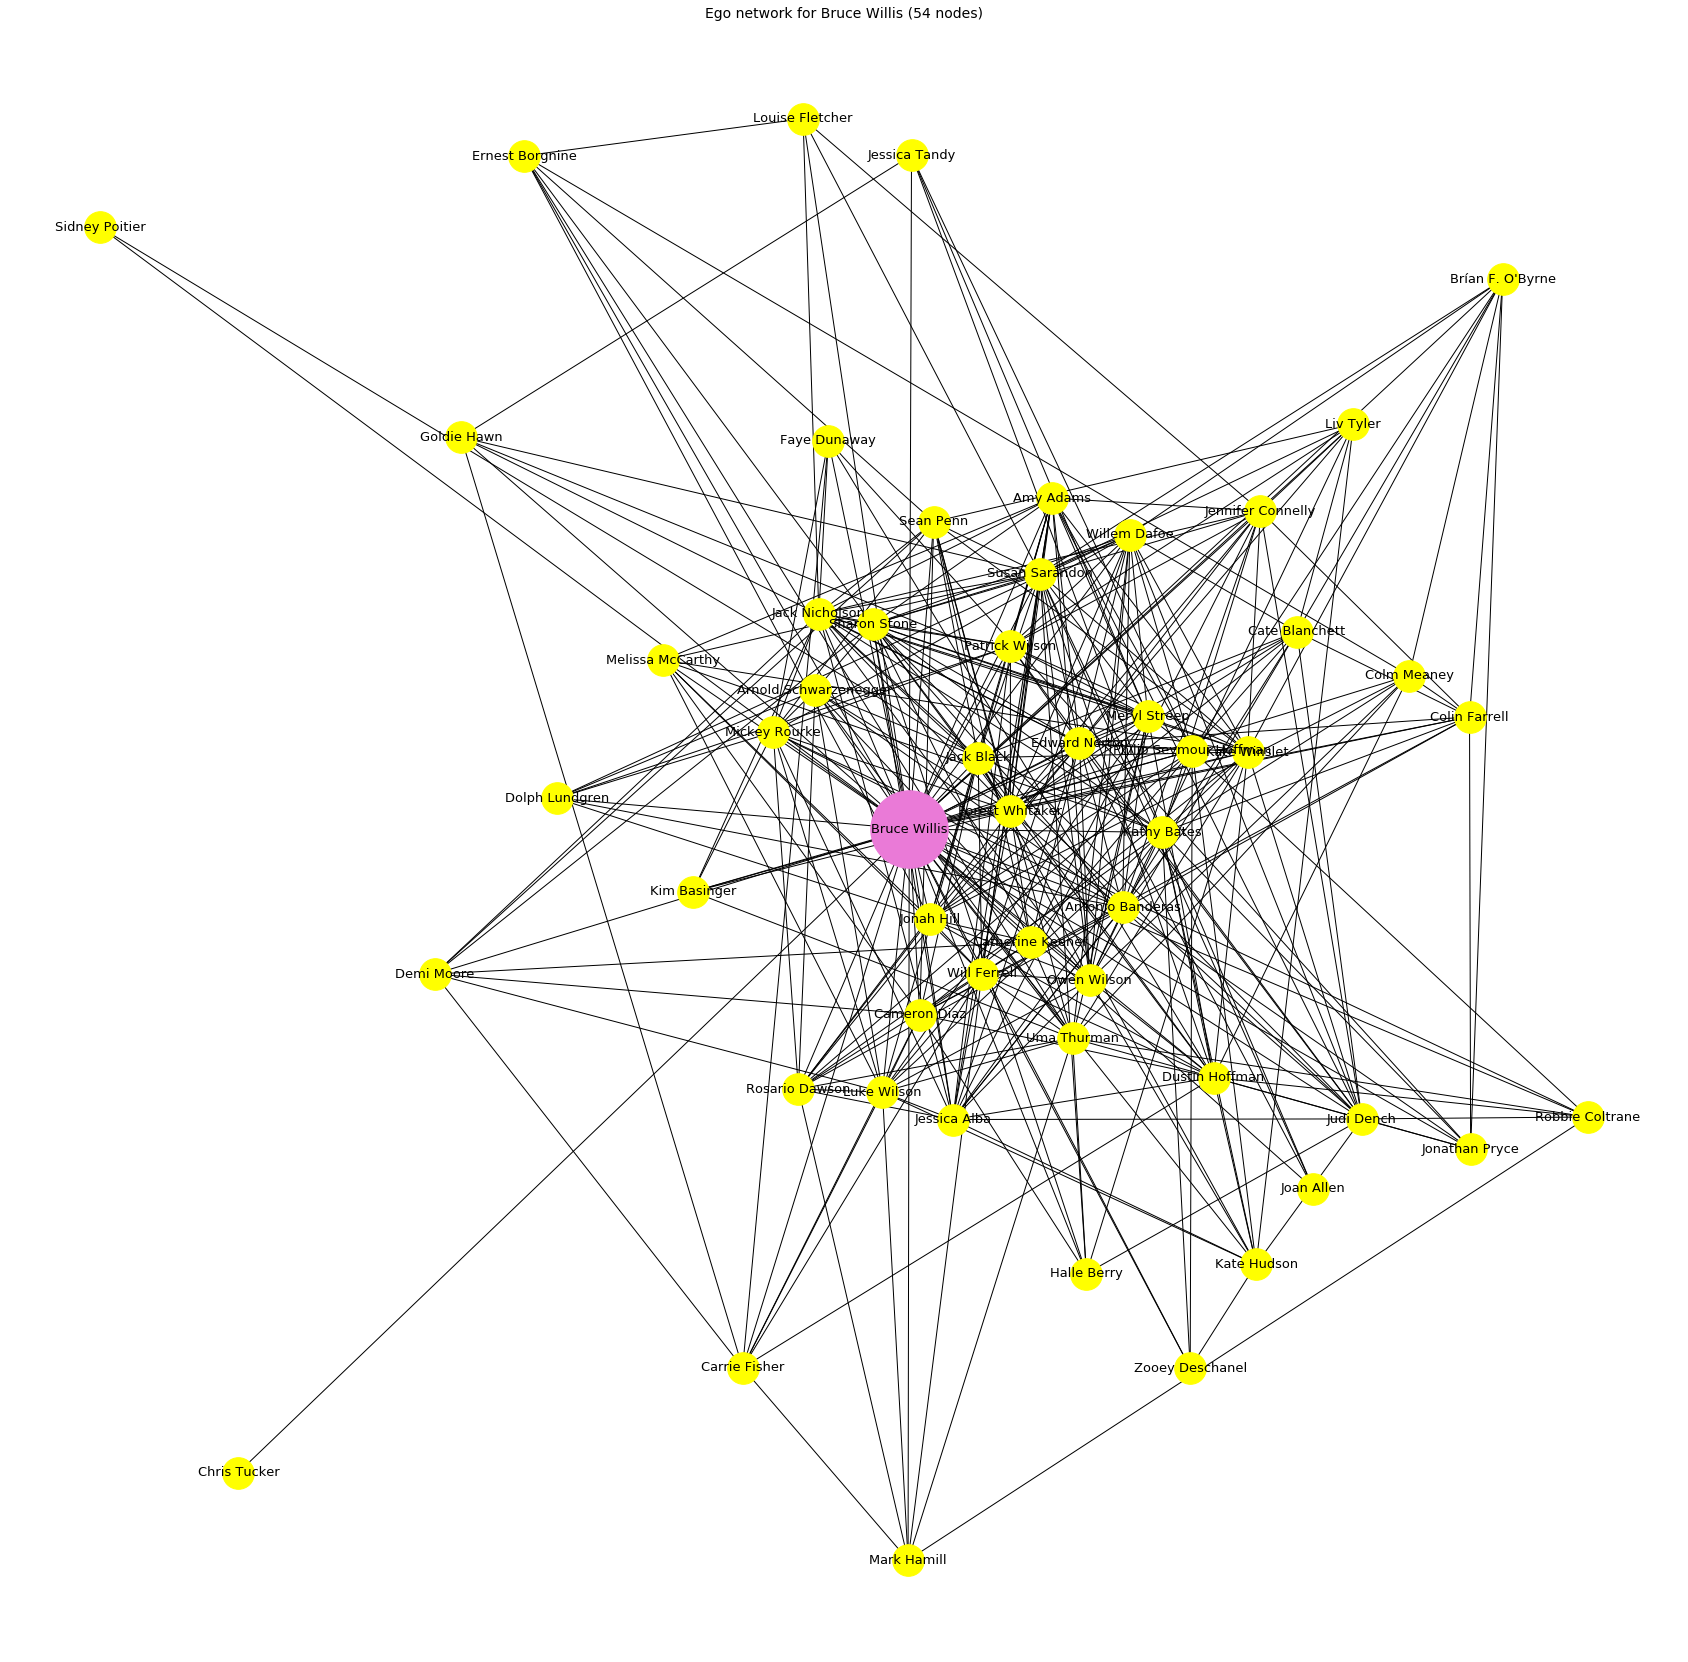

In [339]:
eg_1 = nx.ego_graph( graph_1, ego_node_1 )
# create the figure
plt.figure(figsize=(30,30))
title = "Ego network for %s (%d nodes)" % (ego_node_1, eg_1.number_of_nodes())
plt.title(title, fontsize=14)
# lay out all nodes
pos = nx.spring_layout(graph_1)
# draw the full network
nx.draw_networkx(eg_1, pos, with_labels=True, font_size=13, node_size=1000, node_color="yellow")
# draw the ego in red, with larger node size
nx.draw_networkx_nodes(eg_1, pos, nodelist=[ego_node_1], with_labels=True, font_size=13, node_size=6000, node_color="#ea7ad7", font_color="white")
plt.axis("off")
plt.show()

In [340]:
#Summarising network for Ego Network
print("Number of nodes for Ego Network 1: ", eg_1.number_of_nodes())
print("Number of edges for Ego Network 1: ", eg_1.number_of_edges())
print("Density for Ego Network 1: ", nx.density(eg_1))
print("Is Ego Network 1 connected?: ", nx.is_connected(eg_1))
print("Is Ego Network 1 directed?: ", nx.is_directed(eg_1))

Number of nodes for Ego Network 1:  54
Number of edges for Ego Network 1:  357
Density for Ego Network 1:  0.24947589098532494
Is Ego Network 1 connected?:  True
Is Ego Network 1 directed?:  False


**_<font color= blue>Ego node for Network 2: </font>_**
<a class="anchor" id="Ego-2"></a>
> - We have seen previously that Liam Neeson was the more important node for Network 2 according to his ranking.
> - We categorize this as our ego node for this network.

In [341]:
ego_node_2 = "Liam Neeson"
alters = graph_2.neighbors(ego_node_2)
for node in alters:
    print(node)

Pierce Brosnan
Frances McDormand
Robert Duvall
Steve Carell
Adrien Brody
Gabriel Byrne
Jessica Lange
Helen Hunt
Helena Bonham Carter
Betty White
Julianne Moore
Ben Stiller
Brendan Gleeson
Mila Kunis
Ewan McGregor
Alan Rickman
Kevin Spacey
Laura Dern
John Lithgow
Cher
Julia Roberts
Ralph Fiennes
Sandra Bullock
Paul Rudd
Anthony Hopkins
Patricia Clarkson
Aidan Gillen
Chuck Norris
Ben Kingsley
Tilda Swinton
Christian Bale
Michael Douglas
Colin Firth
Viola Davis
Daisy Ridley
Robert De Niro
Daniel Kaluuya
Sigourney Weaver
Tina Fey
Jamie Foxx
Penélope Cruz
Jeremy Irons
Domhnall Gleeson
David Thewlis
Helen Mirren
Natalie Portman
Kelly Marie Tran
John Boyega
Jonathan Rhys Meyers
Lupita Nyong'o
Diane Keaton


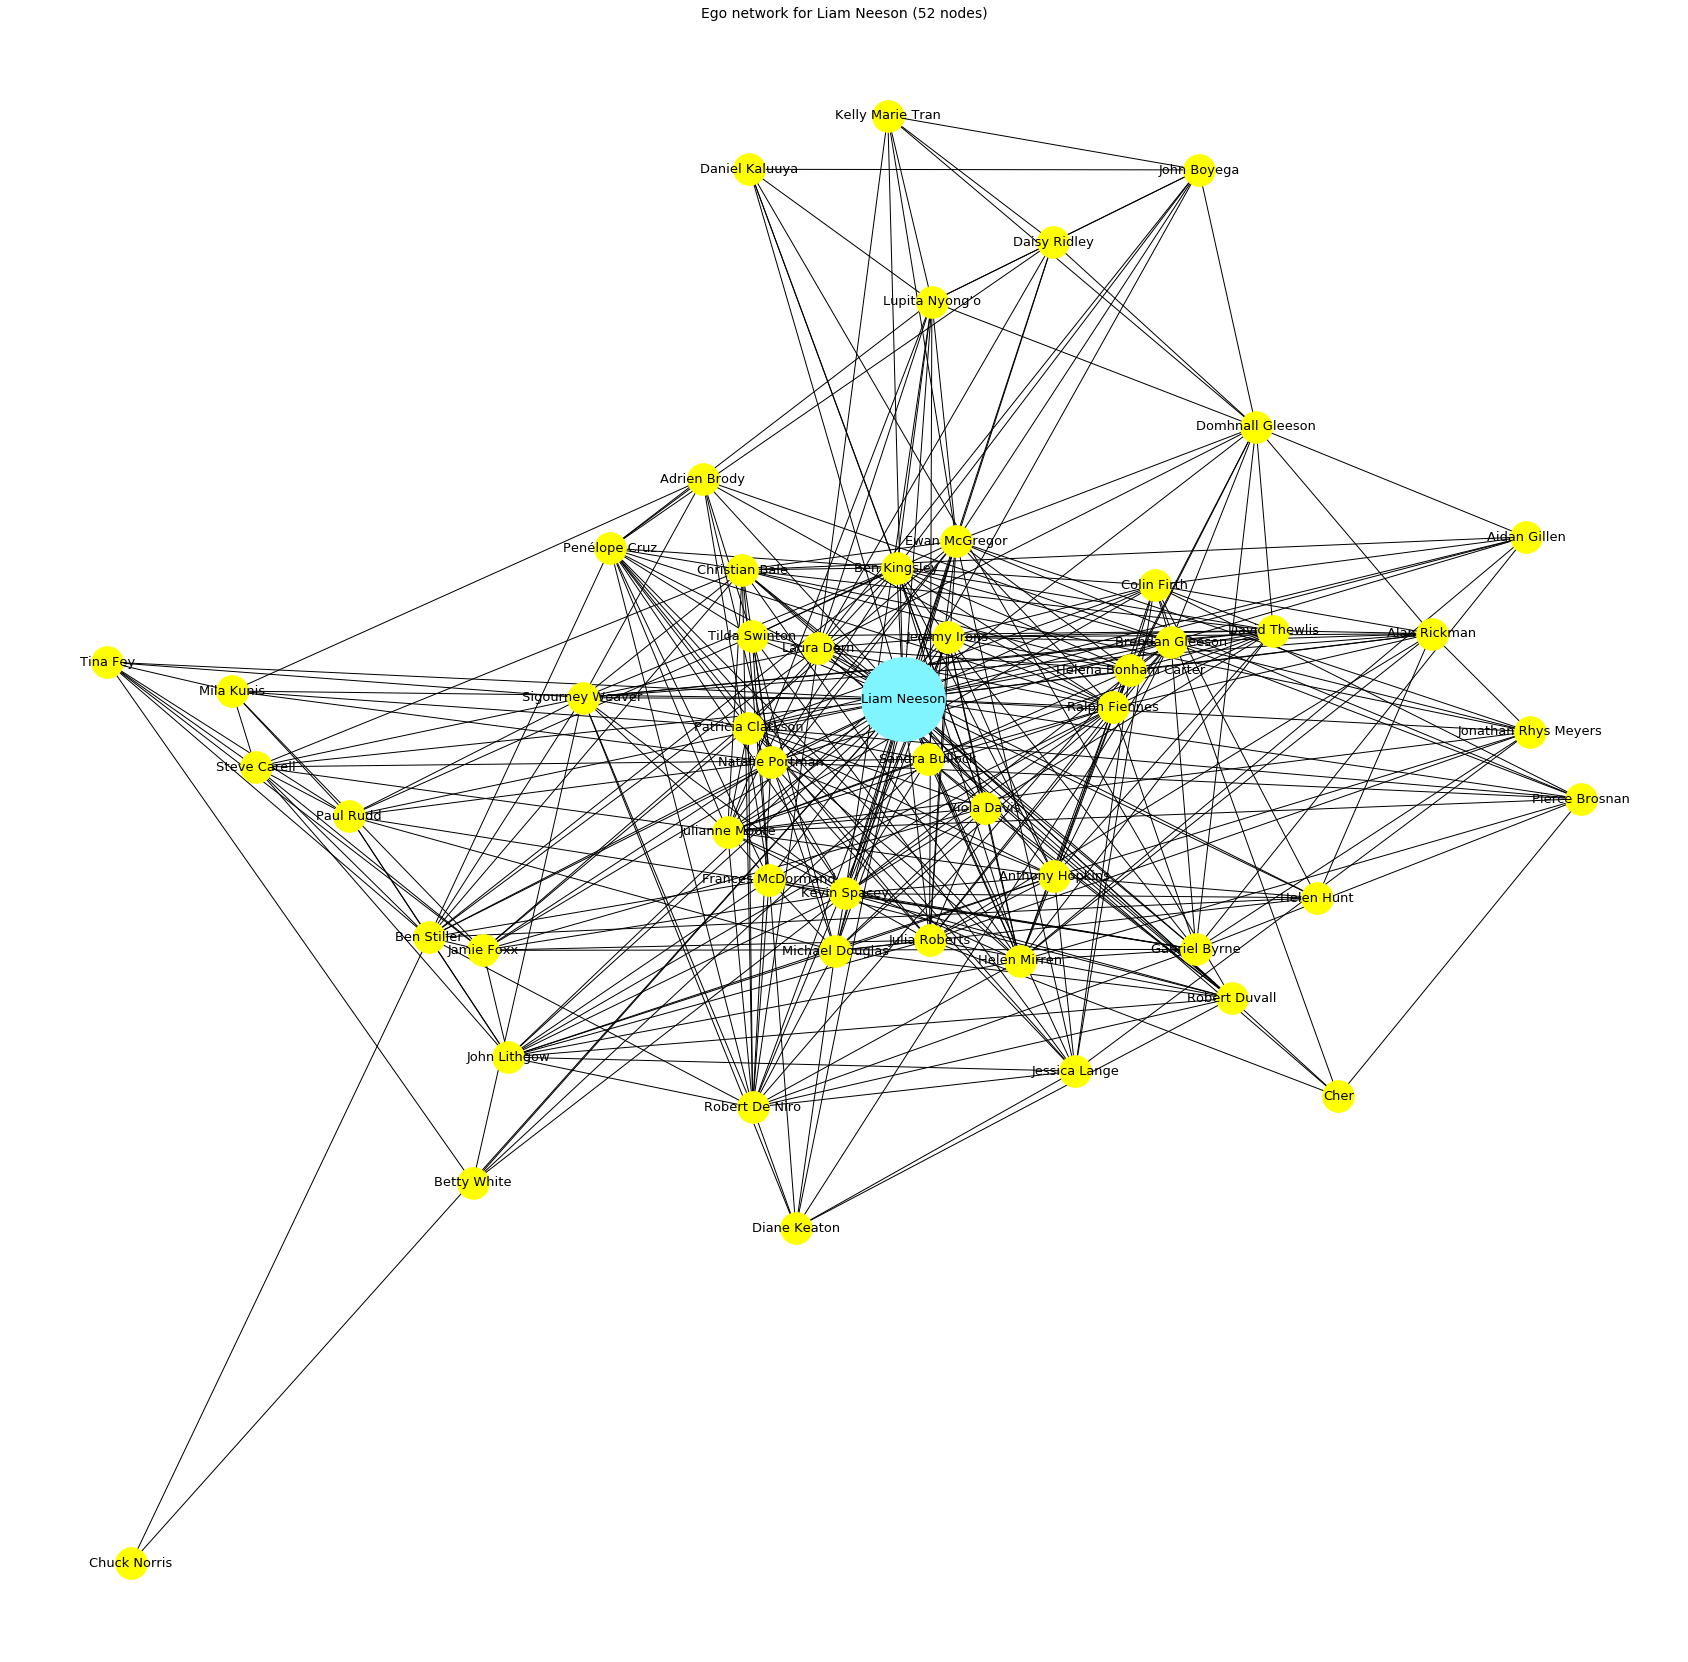

In [342]:
eg_2 = nx.ego_graph( graph_2, ego_node_2 )
# create the figure
plt.figure(figsize=(30,30))
title = "Ego network for %s (%d nodes)" % (ego_node_2, eg_2.number_of_nodes())
plt.title(title, fontsize=14)
# lay out all nodes
pos_2 = nx.spring_layout(graph_2)
# draw the full network
nx.draw_networkx(eg_2, pos_2, with_labels=True, font_size=13, node_size=1000, node_color="yellow")
# draw the ego in red, with larger node size
nx.draw_networkx_nodes(eg_2, pos_2, nodelist=[ego_node_2], with_labels=True, font_size=13, node_size=7000, node_color="#81f5ff", font_color="white")
plt.axis("off")
plt.show()

In [343]:
#Summarising network for Ego Network
print("Number of nodes for Ego Network 2: ", eg_2.number_of_nodes())
print("Number of edges for Ego Network 2: ", eg_2.number_of_edges())
print("Density for Ego Network 2: ", nx.density(eg_2))
print("Is Ego Network 2 connected?: ", nx.is_connected(eg_2))
print("Is Ego Network 2 directed?: ", nx.is_directed(eg_2))

Number of nodes for Ego Network 2:  52
Number of edges for Ego Network 2:  368
Density for Ego Network 2:  0.277526395173454
Is Ego Network 2 connected?:  True
Is Ego Network 2 directed?:  False


 <a class="anchor" id="task-4"></a>
 
# Task 4: Network Visualization

**_<font color= blue>Saving & Exporting the network: </font>_**
> - a) Exporting both the network as GEXF files
> - b) Loading the GEXF file in Gephi. Using the layout functionality to produce a useful visualisation of the network. Saving a final image of your network visualisation as a PNG file.


In [356]:
# Write GEXF XML format for Network 1
nx.write_gexf(graph_1, "Network1.gexf", prettyprint=True)

In [357]:
# Write GEXF XML format for Network 2
nx.write_gexf(graph_2, "Network2.gexf", prettyprint=True)

In [358]:
# look at a portion of the GEXF format for Network 1
lines = open("Network1.gexf","r").readlines()
lines[0:10]

["<?xml version='1.0' encoding='utf-8'?>\n",
 '<gexf version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">\n',
 '  <graph defaultedgetype="undirected" mode="static" name="">\n',
 '    <meta>\n',
 '      <creator>NetworkX 2.3</creator>\n',
 '      <lastmodified>20/02/2020</lastmodified>\n',
 '    </meta>\n',
 '    <nodes>\n',
 '      <node id="Cliff Robertson" label="Cliff Robertson" />\n',
 '      <node id="Jennifer Aniston" label="Jennifer Aniston" />\n']

In [359]:
# look at a portion of the GEXF format for Network 2
lines = open("Network2.gexf","r").readlines()
lines[0:10]

["<?xml version='1.0' encoding='utf-8'?>\n",
 '<gexf version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">\n',
 '  <graph defaultedgetype="undirected" mode="static" name="">\n',
 '    <meta>\n',
 '      <creator>NetworkX 2.3</creator>\n',
 '      <lastmodified>20/02/2020</lastmodified>\n',
 '    </meta>\n',
 '    <nodes>\n',
 '      <node id="Nicolas Cage" label="Nicolas Cage" />\n',
 '      <node id="Pierce Brosnan" label="Pierce Brosnan" />\n']

**_<font color= blue>Visualising the networks with Gephi: </font>_**
> - I used Gephi to visulaize both the Networks, using Fruchterman Reingold layouts for both the graphs.
> - Network1.png represents the network for dataset 1. Nodes are colored in pink and partitioned by their degree.
> - Network2.png represents the network for dataset 2. Nodes are colored in blue and partitioned by their degree.